In [99]:
import pandas as pd
import numpy as np
%matplotlib inline

In [101]:
boston.columns

Index(['DATASET_player', 'DATE', 'PLAYER', 'POSITION', 'TEAM', 'OPPONENT',
       'MINUTES', 'FG_player', 'FGA_player', '3P_player', '3PA_player',
       'FT_player', 'FTA_player', 'OR_player', 'DR_player', 'TOT_player',
       'A_player', 'PF_player', 'ST_player', 'TO_player', 'BL_player',
       'PTS_player', 'DT_Double', 'DraftKings_PTS', 'USAGE', 'DK_POS',
       'DK_SAL', 'VENUE', 'F', 'MIN', 'FG_team', 'FGA_team', '3P_team',
       '3PA_team', 'FT_team', 'FTA_team', 'OR_team', 'DR_team', 'TOT_team',
       'A_team', 'PF_team', 'ST_team', 'TO_team', 'TO TO', 'BL_team',
       'PTS_team', 'PACE', 'OEFF', 'DEFF', 'REST_DAYS', 'OPENING_TOTAL',
       'GAME#', 'Start', 'SPREAD', 'Favorite', 'Spread10', 'DKPTS_PER_MIN'],
      dtype='object')

In [100]:
boston = pd.read_pickle('BOS.pkl')
boston = boston.drop(['ROAD_HOME','1Q', '2Q', '3Q', '4Q', 'OT1', 'OT2',
       'OT3', 'OT4','DATASET_team','DK_PTS','Starters','OPENING_SPREAD','POSS','STARTING LINEUPS', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39','MAIN REF', 'CREW','MOVEMENTS','ODDS','BOX SCORE','OPENING ODDS','CLOSING ODDS',
       'MONEYLINE', 'HALFTIME'], axis=1)

boston.head()

,DATASET_player,DATE,PLAYER,POSITION,TEAM,OPPONENT,MINUTES,FG_player,FGA_player,3P_player,...,OEFF,DEFF,REST_DAYS,OPENING_TOTAL,GAME#,Start,SPREAD,Favorite,Spread10,DKPTS_PER_MIN
0,2017-2018 Regular Season,10/17/2017,Gordon Hayward,SF,Boston,Cleveland,5.25,1,2,0,...,98.721532,101.713094,3+,214.5,1,1.0,4.0,True,False,0.619048
1,2017-2018 Regular Season,10/17/2017,Jayson Tatum,SF,Boston,Cleveland,36.53,5,12,1,...,98.721532,101.713094,3+,214.5,1,1.0,4.0,True,False,0.889680
2,2017-2018 Regular Season,10/17/2017,Al Horford,C,Boston,Cleveland,32.12,2,7,0,...,98.721532,101.713094,3+,214.5,1,1.0,4.0,True,False,0.848381
3,2017-2018 Regular Season,10/17/2017,Jaylen Brown,SF,Boston,Cleveland,39.60,11,23,2,...,98.721532,101.713094,3+,214.5,1,1.0,4.0,True,False,0.909091
4,2017-2018 Regular Season,10/17/2017,Kyrie Irving,PG,Boston,Cleveland,39.35,8,17,4,...,98.721532,101.713094,3+,214.5,1,1.0,4.0,True,False,1.283355


,DraftKings_PTS,MINUTES,DKPTS_PER_MIN
count,99.000000,99.000000,99.000000
mean,27.098485,31.573434,0.860053
std,9.191196,5.662962,0.254467
min,4.750000,9.350000,0.228146
25%,20.625000,27.895000,0.677685
50%,26.500000,31.570000,0.886610
75%,33.625000,35.260000,1.025385
max,51.250000,46.500000,1.409566


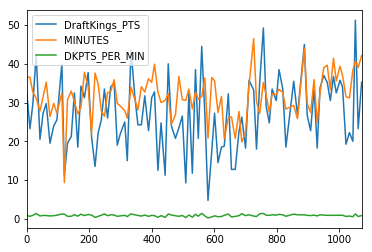

In [113]:
DK_PPM = boston[['DATASET_player', 'DATE', 'PLAYER',
                 'DraftKings_PTS','MINUTES',
                 'DKPTS_PER_MIN']]
DK_PPM = DK_PPM.loc[(DK_PPM['PLAYER'] == 'Jayson Tatum')]
DK_PPM.plot()
DK_PPM.describe()


In [98]:
#Looking at the rolling average of a player's minutes played at lags of 2,3,5 and 10 games

minutes = boston[['DATE','DATASET_player', 'DATE', 'GAME#', 'PLAYER', 'MINUTES']]
minutes = minutes.loc[(minutes['PLAYER'] == 'Jaylen Brown')]
minutes['Roll2'] = minutes['MINUTES'].rolling(2).mean().shift()
minutes['Roll3'] = minutes['MINUTES'].rolling(3).mean().shift()
minutes['Roll5'] = minutes['MINUTES'].rolling(5).mean().shift()
# minutes['Roll10'] = minutes['MINUTES'].rolling(10).mean().shift()
minutes['Diff2'] = abs(minutes['MINUTES'] - minutes['Roll2'])
minutes['Diff3'] = abs(minutes['MINUTES'] - minutes['Roll3'])
minutes['Diff5'] = abs(minutes['MINUTES'] - minutes['Roll5'])
# minutes['Diff10'] = abs(minutes['MINUTES'] - minutes['Roll10'])
# minutes.plot()
minutes.describe()
# minutes

,GAME#,MINUTES,Roll2,Roll3,Roll5,Diff2,Diff3,Diff5
count,88.000000,88.00000,86.000000,85.000000,83.000000,86.00000,85.000000,83.000000
mean,50.034091,31.07625,30.918547,30.892078,30.819976,4.19064,3.957529,3.937735
std,30.156850,4.96963,3.575668,3.108649,2.577965,3.58151,3.487457,3.382811
min,1.000000,16.02000,20.350000,23.310000,24.812000,0.24500,0.243333,0.024000
25%,23.750000,28.14250,28.357500,28.650000,29.314000,2.10625,1.880000,1.820000
50%,49.500000,31.47500,30.805000,31.443333,31.132000,3.30500,3.123333,3.186000
75%,77.250000,34.14250,33.141250,32.710000,32.675000,5.22000,4.766667,4.587000
max,101.000000,45.60000,39.715000,39.926667,37.466000,23.15500,23.906667,20.396000


In [21]:
boston.ROAD_HOME.value_counts()

H    548
R    530
Name: ROAD_HOME, dtype: int64

In [18]:
check = boston.ROAD_HOME == boston.VENUE

In [19]:
check.value_counts()

False    1078
dtype: int64

In [ ]:
boston['DK_check'] = check

In [ ]:
DK = boston.loc[boston['DK_check'] == False]


In [ ]:
DK[['PLAYER','DK_PTS','DraftKings_PTS','MINUTES','3P_player','TOT_player', 'A_player','ST_player', 'TO_player',
       'BL_player', 'PTS_player', 'DT_Double']]

In [ ]:
boston.OPENING_SPREAD.value_counts()